<a href="https://colab.research.google.com/github/kdvalentine/cryptodata/blob/main/stock_correlaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

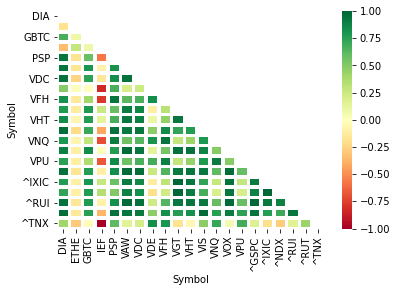

In [ ]:
import numpy as np
import pandas as pd
#used to grab the stock prices, with yahoo
import pandas_datareader as web
from datetime import datetime
#to visualize the results
import matplotlib.pyplot as plt
import seaborn
 
#select start date for correlation window as well as list of tickers
start = datetime(2020, 1, 1)
#symbols_list = ['AAPL', 'F', 'TWTR', 'FB', 'MSFT', 'AMZN', 'GOOGL', 'DIA']
symbols_list = ['GBTC', 'ETHE', 'PSP', '^GSPC', '^IXIC', '^NDX', '^RUI', '^RUT', 'VAW', 'VDC', 'VDE', 'VFH', 'VGT', 'VHT', 'VIS', 'VNQ', 'VOX', 'VPU', '^TNX', 'IEF', 'DIA']
#array to store prices
symbols=[]

#pull price for each symbol in list defined above
for ticker in symbols_list: 
    r = web.DataReader(ticker, 'yahoo', start)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)

# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]

df_pivot = df.pivot(index='Date', columns='Symbol', values='Close').reset_index()
corr_df = df_pivot.corr(method='pearson')

corr_df = df_pivot.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
#del corr_df.index.name
corr_df.head(10)

#take the bottom triangle since it repeats itself
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
#generate plot
seaborn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()